<a href="https://colab.research.google.com/github/aarsh121/Data-analysis-of-Used-car/blob/main/Recipe_Site_Web_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [9]:
print(df.servings.unique())
print(df.category.unique())

['6' '4' '1' '2' '4 as a snack' '6 as a snack']
['Pork' 'Potato' 'Breakfast' 'Beverages' 'One Dish Meal' 'Chicken Breast'
 'Lunch/Snacks' 'Chicken' 'Vegetable' 'Meat' 'Dessert']


In [10]:
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df1=df
df1.shape

(947, 8)

In [15]:
missing_val=df1.isnull().sum().to_frame(name='missing count')
missing_val['%missing']=round(missing_val/947*100,2)
#missing_val['%missing']=round(df1.isna().mean(),2)
missing_val

,missing count,%missing
recipe,0,0.00
calories,52,5.49
carbohydrate,52,5.49
sugar,52,5.49
protein,52,5.49
category,0,0.00
servings,0,0.00
high_traffic,373,39.39


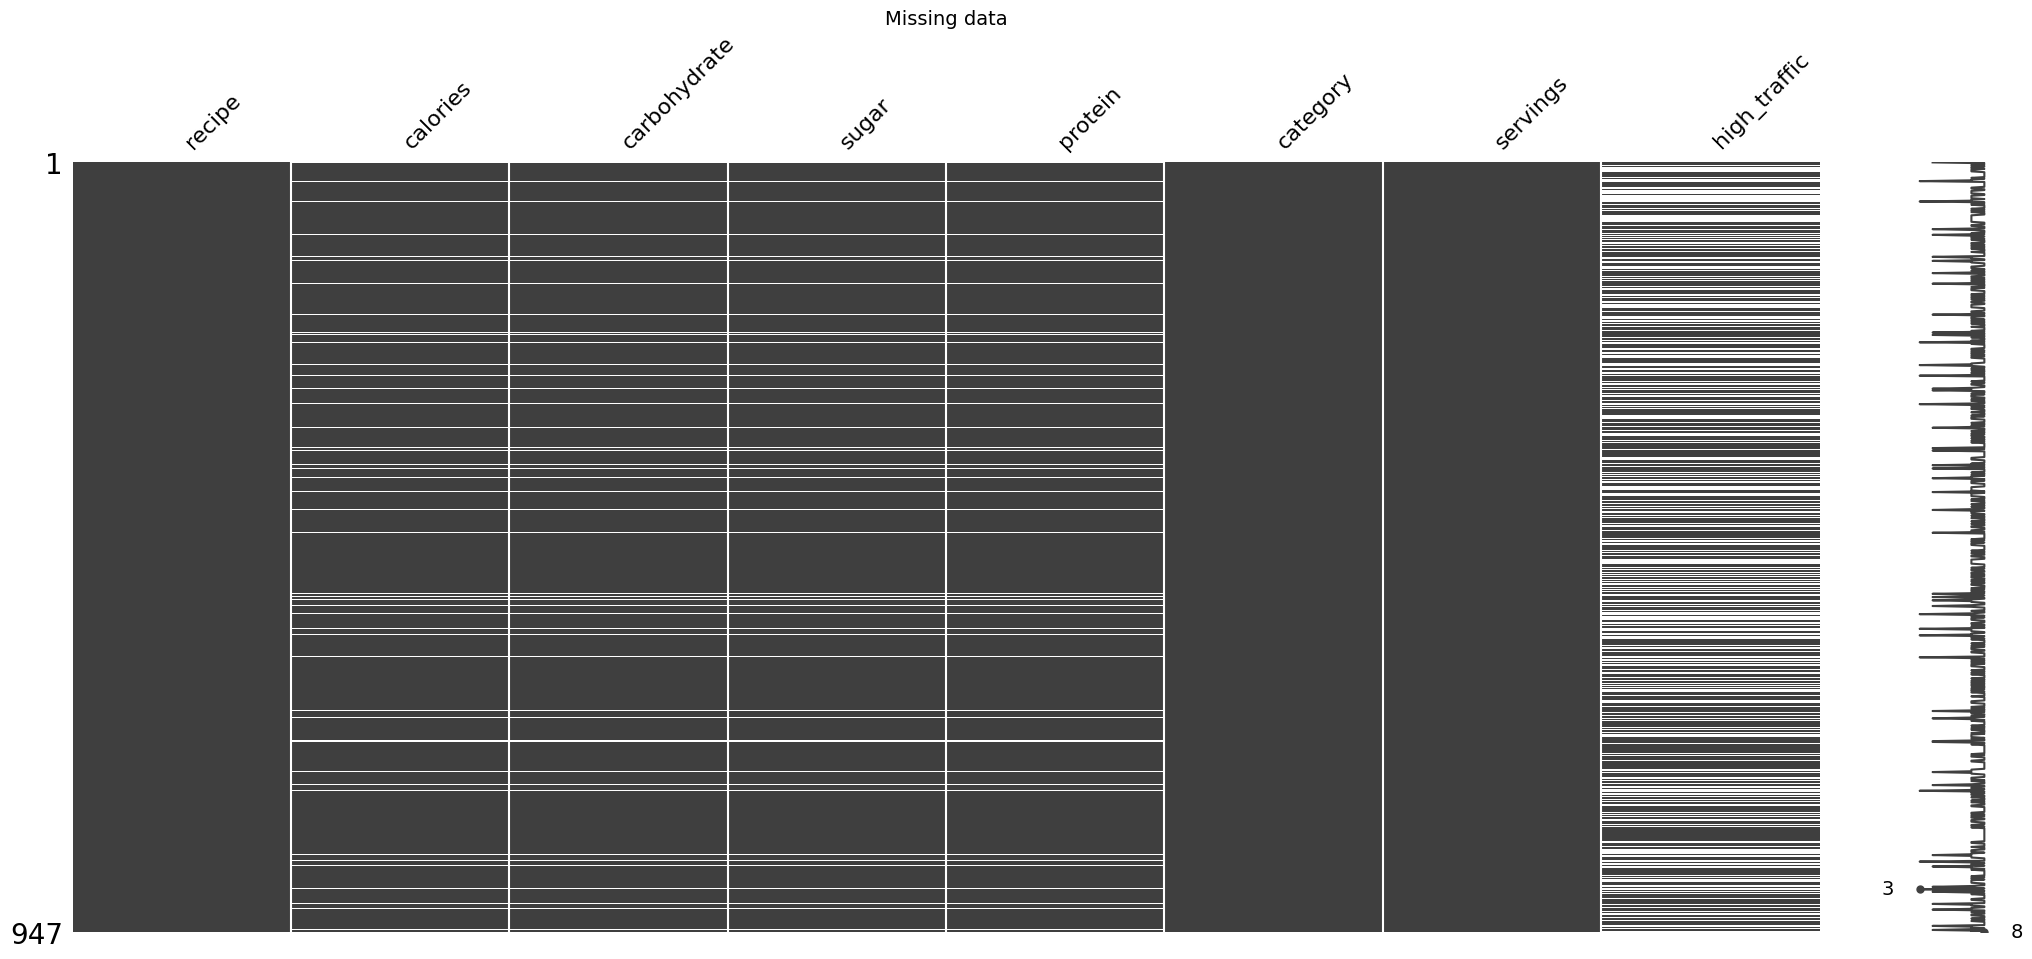

In [17]:
import missingno as msno
msno.matrix(df1)
plt.title('Missing data', fontsize=14)
plt.show()

In [22]:
df1.set_index('recipe', inplace=True)
df1.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
1,NaN,NaN,NaN,NaN,Pork,6,High
2,35.48,38.56,0.66,0.92,Potato,4,High
3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
4,97.03,30.56,38.63,0.02,Beverages,4,High
5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [23]:
df1['high_traffic'].fillna('Low', inplace=True)
df1['high_traffic'].value_counts()


High    574
Low     373
Name: high_traffic, dtype: int64

In [24]:
df1['calories'].describe()

count     895.000000
mean      435.939196
std       453.020997
min         0.140000
25%       110.430000
50%       288.550000
75%       597.650000
max      3633.160000
Name: calories, dtype: float64

In [26]:
cal_dict=df1.groupby('category')['calories'].median().to_dict()
cal_dict

{'Beverages': 126.455,
 'Breakfast': 229.38,
 'Chicken': 379.87,
 'Chicken Breast': 371.33500000000004,
 'Dessert': 288.55,
 'Lunch/Snacks': 369.505,
 'Meat': 460.87,
 'One Dish Meal': 419.28,
 'Pork': 399.26,
 'Potato': 269.46,
 'Vegetable': 124.30499999999999}

In [28]:
df1['calories']=df1['calories'].fillna(df1['category'].map(cal_dict))
df1['calories'].describe()

count     947.000000
mean      431.056241
std       441.370267
min         0.140000
25%       114.410000
50%       296.920000
75%       576.225000
max      3633.160000
Name: calories, dtype: float64

In [32]:
carb_dict=df1.groupby('category')['carbohydrate'].median().to_dict()
df1['carbohydrate'].describe()

count    895.000000
mean      35.069676
std       43.949032
min        0.030000
25%        8.375000
50%       21.480000
75%       44.965000
max      530.420000
Name: carbohydrate, dtype: float64

In [33]:
df1['carbohydrate']=df1['carbohydrate'].fillna(df1['category'].map(carb_dict))
df1.describe()

,calories,carbohydrate,sugar,protein
count,947.000000,947.000000,895.000000,895.000000
mean,431.056241,34.454947,9.046547,24.149296
std,441.370267,42.844746,14.679176,36.369739
min,0.140000,0.030000,0.010000,0.000000
25%,114.410000,9.135000,1.690000,3.195000
50%,296.920000,21.190000,4.550000,10.800000
75%,576.225000,42.590000,9.800000,30.200000
max,3633.160000,530.420000,148.750000,363.360000


In [35]:
df1['sugar'].describe()
sugar_dict=df1.groupby('category')['sugar'].median().to_dict()

In [37]:
df1['sugar'] = df1['sugar'].fillna(df1['category'].map(sugar_dict))
print(df1['sugar'].describe())

count    947.000000
mean       8.887598
std       14.372359
min        0.010000
25%        1.795000
50%        4.400000
75%        9.565000
max      148.750000
Name: sugar, dtype: float64


In [39]:
pro_dict=df1.groupby('category')['protein'].median().to_dict()
df1['protein'].describe()

count    895.000000
mean      24.149296
std       36.369739
min        0.000000
25%        3.195000
50%       10.800000
75%       30.200000
max      363.360000
Name: protein, dtype: float64

In [40]:
protein_dict = df1.groupby('category')['protein'].median().to_dict()
protein_dict

{'Beverages': 0.41000000000000003,
 'Breakfast': 11.685,
 'Chicken': 32.98,
 'Chicken Breast': 37.769999999999996,
 'Dessert': 4.81,
 'Lunch/Snacks': 12.965,
 'Meat': 28.53,
 'One Dish Meal': 28.48,
 'Pork': 29.82,
 'Potato': 5.9,
 'Vegetable': 4.835}

In [42]:
df1['protein'] = df1['protein'].fillna(df1['category'].map(protein_dict))
print(df1['protein'].describe())

count    947.000000
mean      23.957212
std       35.479461
min        0.000000
25%        3.465000
50%       11.240000
75%       29.820000
max      363.360000
Name: protein, dtype: float64


In [43]:
df1['category'].value_counts()

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64

In [44]:
df1['category']=df1['category'].str.replace('Chicken Breast', 'Chicken')
df1['category']=df1['category'].astype('category')
print(df['category'].describe())

count         947
unique         10
top       Chicken
freq          172
Name: category, dtype: object


In [46]:
df1['servings'].unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [47]:
df1['servings']=df1['servings'].str.rstrip(' as a snack')
df1['servings']=df1['servings'].astype('int')
df1['servings'].describe()

count    947.000000
mean       3.477297
std        1.732741
min        1.000000
25%        2.000000
50%        4.000000
75%        4.000000
max        6.000000
Name: servings, dtype: float64

In [50]:
print(df1.dtypes)
df1.describe(include='all')

calories         float64
carbohydrate     float64
sugar            float64
protein          float64
category        category
servings           int64
high_traffic      object
dtype: object


,calories,carbohydrate,sugar,protein,category,servings,high_traffic
count,947.000000,947.000000,947.000000,947.000000,947,947.000000,947
unique,NaN,NaN,NaN,NaN,10,NaN,2
top,NaN,NaN,NaN,NaN,Chicken,NaN,High
freq,NaN,NaN,NaN,NaN,172,NaN,574
mean,431.056241,34.454947,8.887598,23.957212,NaN,3.477297,NaN
std,441.370267,42.844746,14.372359,35.479461,NaN,1.732741,NaN
min,0.140000,0.030000,0.010000,0.000000,NaN,1.000000,NaN
25%,114.410000,9.135000,1.795000,3.465000,NaN,2.000000,NaN
50%,296.920000,21.190000,4.400000,11.240000,NaN,4.000000,NaN
75%,576.225000,42.590000,9.565000,29.820000,NaN,4.000000,NaN


In [55]:
web_traffic=df1['high_traffic'].value_counts().to_frame()
web_traffic['percent']=round(df1['high_traffic'].value_counts(normalize=True)*100,2)
web_traffic

,high_traffic,percent
High,574,60.61
Low,373,39.39


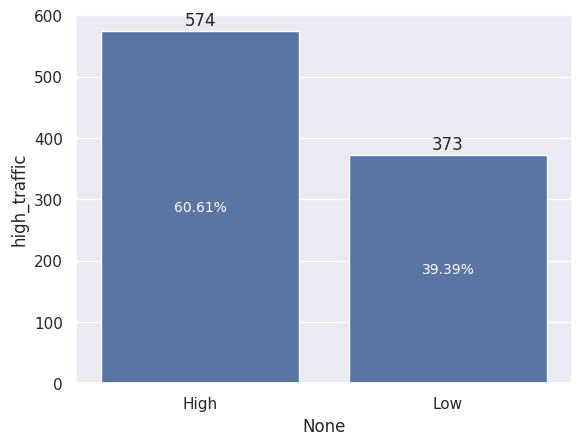

In [66]:
sns.set_style('darkgrid')
sns.set(rc={"figure.dpi":100})
ax=sns.barplot(data=web_traffic, x=web_traffic.index, y='high_traffic')
for i in ax.containers:
  ax.bar_label(i, padding=1.04)
ax.bar_label(ax.containers[0], labels=['60.61%', '39.39%'], label_type='center', color='white', fontsize=10)
plt.show()



In [1]:
cat=df['category'].value_counts().to_frame()
cat['percntg']=round(cat['category']/cat['category'].sum()*100,2)
cat

ax=sns.barplot(data=cat, y=cat.index, x='category')

ax.bar_label(ax.containers[0])

plt.show()



NameError: name 'df' is not defined